## Load and Download Dataset from KaggleHub
We use `kagglehub` to fetch the real-world EV battery telemetry dataset.

In [1]:
# Install kagglehub if not already installed
%pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("atechnohazard/battery-and-heating-data-in-real-driving-cycles")

print("Path to dataset files:", path)

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


/opt/homebrew/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/yashkathiriya/.cache/kagglehub/datasets/atechnohazard/battery-and-heating-data-in-real-driving-cycles/versions/1


In [2]:
import os
import pandas as pd
import matplotlib
import seaborn as sns

In [3]:
data_path = path
all_data = []
file_list = []
skipped_cycles = []
valid_cycles = []
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv') and not f.startswith('.')]
print(f"🗂️ Total CSV files found: {len(csv_files)}")


🗂️ Total CSV files found: 70


## Preprocessing Files
We iterate through all CSVs, clean the column names, handle encoding issues, and skip malformed files.

In [4]:
for filename in sorted(os.listdir(data_path)):
    if filename.endswith(".csv"):
        full_path = os.path.join(data_path, filename)
        file_status = f"🔍 {filename}: "

        # Try loading the file with fallback encoding
        try:
            df = pd.read_csv(full_path, encoding='utf-8', sep=';')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(full_path, encoding='ISO-8859-1', sep=';')
            except Exception as e:
                print(file_status + f"❌ Failed to load (encoding error): {e}")
                bad_files.append(filename)
                continue

        # Clean column names
        df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-z0-9_]', '', regex=True)

        # Check for duplicate columns
        if df.columns.duplicated().any():
            print(file_status + "⚠️ Skipped (duplicate columns)")
            skipped_cycles.append(filename)
            continue

        # Check for required structure
        if df.shape[1] < 5 or 'time_s' not in df.columns:
            print(file_status + "⚠️ Skipped (missing expected columns or structure)")
            skipped_cycles.append(filename)
            continue

        # Passed all checks ✅
        df['cycle_id'] = filename.replace('.csv', '')
        all_data.append(df)
        valid_cycles.append(filename)
        print(file_status + "✅ Loaded successfully")

print(f"\n📊 Summary:")
print(f"✅ Loaded: {len(valid_cycles)}")
print(f"❌ Skipped: {len(skipped_cycles)}")

🔍 TripA01.csv: ✅ Loaded successfully
🔍 TripA02.csv: ✅ Loaded successfully
🔍 TripA03.csv: ✅ Loaded successfully
🔍 TripA04.csv: ✅ Loaded successfully
🔍 TripA05.csv: ✅ Loaded successfully
🔍 TripA06.csv: ✅ Loaded successfully
🔍 TripA07.csv: ✅ Loaded successfully
🔍 TripA08.csv: ✅ Loaded successfully
🔍 TripA09.csv: ✅ Loaded successfully
🔍 TripA10.csv: ✅ Loaded successfully
🔍 TripA11.csv: ✅ Loaded successfully
🔍 TripA12.csv: ✅ Loaded successfully
🔍 TripA13.csv: ✅ Loaded successfully
🔍 TripA14.csv: ✅ Loaded successfully
🔍 TripA15.csv: ✅ Loaded successfully
🔍 TripA16.csv: ✅ Loaded successfully
🔍 TripA17.csv: ✅ Loaded successfully
🔍 TripA18.csv: ✅ Loaded successfully
🔍 TripA19.csv: ✅ Loaded successfully
🔍 TripA20.csv: ✅ Loaded successfully
🔍 TripA21.csv: ✅ Loaded successfully
🔍 TripA22.csv: ✅ Loaded successfully
🔍 TripA23.csv: ✅ Loaded successfully
🔍 TripA24.csv: ✅ Loaded successfully
🔍 TripA25.csv: ✅ Loaded successfully
🔍 TripA26.csv: ✅ Loaded successfully
🔍 TripA27.csv: ✅ Loaded successfully
🔍

In [5]:
import json

def save_cycle_file_status(valid_cycles, skipped_cycles, base_name="cycle_file_status"):
    # Save as TXT
    with open(f"{base_name}_valid_cycles.txt", "w") as f:
        for file in valid_cycles:
            f.write(f"{file}\n")

    with open(f"{base_name}_skipped_cycles.txt", "w") as f:
        for file in skipped_cycles:
            f.write(f"{file}\n")

    with open(f"{base_name}_summary.txt", "w") as f:
        f.write(f"✅ Valid cycles ({len(valid_cycles)}):\n")
        f.writelines([f"  - {name}\n" for name in valid_cycles])
        f.write(f"\n❌ Skipped cycles ({len(skipped_cycles)}):\n")
        f.writelines([f"  - {name}\n" for name in skipped_cycles])

    # Save as JSON
    with open(f"{base_name}.json", "w") as f:
        json.dump({
            "valid_cycles": valid_cycles,
            "skipped_cycles": skipped_cycles
        }, f, indent=2)

    print(f"📁 Saved: {base_name}_valid_cycles.txt, {base_name}_skipped_cycles.txt, {base_name}.json, and summary.")



In [6]:
save_cycle_file_status(valid_cycles, skipped_cycles)


📁 Saved: cycle_file_status_valid_cycles.txt, cycle_file_status_skipped_cycles.txt, cycle_file_status.json, and summary.


In [7]:
df_all = pd.concat(all_data, ignore_index=True)
print(df_all.shape)



(467701, 30)


In [8]:
df_all.head()

,time_s,velocity_kmh,elevation_m,throttle_,motor_torque_nm,longitudinal_acceleration_ms2,regenerative_braking_signal,battery_voltage_v,battery_current_a,battery_temperature_c,...,heater_voltage_v,heater_current_a,ambient_temperature_c,coolant_temperature_heatercore_c,requested_coolant_temperature_c,coolant_temperature_inlet_c,heat_exchanger_temperature_c,cabin_temperature_sensor_c,cycle_id,unnamed_23
0,0.0,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.20,21.0,...,0.0,0.0,25.5,0.0,0.0,0.0,30.5,24.5,TripA01,NaN
1,0.1,0.0,574.0,0.0,0.0,0.00,0.0,391.4,-2.21,21.0,...,0.0,0.0,25.5,0.0,0.0,0.0,30.5,24.5,TripA01,NaN
2,0.2,0.0,574.0,0.0,0.0,-0.01,0.0,391.4,-2.26,21.0,...,0.0,0.0,25.5,0.0,0.0,0.0,30.5,24.5,TripA01,NaN
3,0.3,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.30,21.0,...,0.0,0.0,25.5,0.0,0.0,0.0,30.5,24.5,TripA01,NaN
4,0.4,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.30,21.0,...,0.0,0.0,25.5,0.0,0.0,0.0,30.5,24.5,TripA01,NaN


In [9]:
df_all.columns.tolist()

['time_s',
 'velocity_kmh',
 'elevation_m',
 'throttle_',
 'motor_torque_nm',
 'longitudinal_acceleration_ms2',
 'regenerative_braking_signal',
 'battery_voltage_v',
 'battery_current_a',
 'battery_temperature_c',
 'max_battery_temperature_c',
 'soc_',
 'displayed_soc_',
 'min_soc_',
 'max_soc_',
 'heating_power_can_kw',
 'heating_power_lin_w',
 'requested_heating_power_w',
 'aircon_power_kw',
 'heater_signal',
 'heater_voltage_v',
 'heater_current_a',
 'ambient_temperature_c',
 'coolant_temperature_heatercore_c',
 'requested_coolant_temperature_c',
 'coolant_temperature_inlet_c',
 'heat_exchanger_temperature_c',
 'cabin_temperature_sensor_c',
 'cycle_id',
 'unnamed_23']

## Aggregating Trip-Level Summary
We group by each driving cycle (`cycle_id`) and extract statistics like max temperature, average current, voltage, and heating power.

In [10]:
# columns for focused analysis
selected_columns = [
    'cycle_id',
    'time_s',
    'battery_temperature_c',
    'max_battery_temperature_c',
    'battery_current_a',
    'battery_voltage_v',
    'soc_',
    'ambient_temperature_c',
    'requested_heating_power_w',
    'coolant_temperature_inlet_c',
    'heat_exchanger_temperature_c',
    'cabin_temperature_sensor_c'
]


df_selected = df_all[selected_columns].dropna()
print(df_selected.shape)
df_selected.head()


(157114, 12)


,cycle_id,time_s,battery_temperature_c,max_battery_temperature_c,battery_current_a,battery_voltage_v,soc_,ambient_temperature_c,requested_heating_power_w,coolant_temperature_inlet_c,heat_exchanger_temperature_c,cabin_temperature_sensor_c
0,TripA01,0.0,21.0,22.0,-2.20,391.4,86.9,25.5,85.0,0.0,30.5,24.5
1,TripA01,0.1,21.0,22.0,-2.21,391.4,86.9,25.5,85.0,0.0,30.5,24.5
2,TripA01,0.2,21.0,22.0,-2.26,391.4,86.9,25.5,85.0,0.0,30.5,24.5
3,TripA01,0.3,21.0,22.0,-2.30,391.4,86.9,25.5,85.0,0.0,30.5,24.5
4,TripA01,0.4,21.0,22.0,-2.30,391.4,86.9,25.5,85.0,0.0,30.5,24.5


In [11]:
#one row per driving cycle 
summary_df = df_selected.groupby('cycle_id').agg({
    'battery_temperature_c': ['max', 'mean'],
    'max_battery_temperature_c': 'max',
    'battery_current_a': 'mean',
    'battery_voltage_v': 'mean',
    'soc_': ['min', 'max'],
    'ambient_temperature_c': 'mean',
    'requested_heating_power_w': 'mean',
    'time_s': lambda x: x.max() - x.min()  #seconds
}).reset_index()


In [12]:
# flattening multiindex 
summary_df.columns = [
    'cycle_id',
    'temp_max', 'temp_mean',
    'temp_max_reported',
    'current_mean', 'voltage_mean',
    'soc_min', 'soc_max',
    'ambient_temp_mean',
    'heating_power_mean',
    'trip_duration_s'
]


In [13]:
print(summary_df.shape)
summary_df.head()


(12, 11)


,cycle_id,temp_max,temp_mean,temp_max_reported,current_mean,voltage_mean,soc_min,soc_max,ambient_temp_mean,heating_power_mean,trip_duration_s
0,TripA01,22.0,21.940141,23.0,-11.953476,388.483996,81.5,86.9,30.769972,85.000000,1008.9
1,TripA02,26.0,24.972960,27.0,-20.384738,381.553837,66.9,80.3,31.127573,85.000000,1412.9
2,TripA23,17.0,16.886255,17.0,-11.885933,388.445060,81.8,87.4,19.242787,977.274806,1042.5
3,TripA24,19.0,18.103831,19.0,-31.208109,380.906925,74.2,81.9,18.713403,1065.378183,532.1
4,TripA25,20.0,19.543322,21.0,-26.908419,377.404315,65.1,74.4,17.960967,1414.107541,762.6


## 🚨 Step 4: Detect Anomalies Using Z-Scores
We calculate Z-scores for key metrics and flag cycles that significantly deviate from the norm.

In [14]:
summary_df.to_csv("cycle_summary.csv", index=False)

Z-score anomaly detection when battery temperature is significantly high/low than usual

In [15]:
from scipy.stats import zscore
summary_df['z_temp_max'] = zscore(summary_df['temp_max']) #calculate z
summary_df['is_anomaly'] = summary_df['z_temp_max'].abs() > 1.5 # flagging outliers
temperature_anomalies = summary_df[summary_df['is_anomaly']]
print(f" Found {len(temperature_anomalies)} anomalous cycles:")
temperature_anomalies[['cycle_id', 'temp_max', 'z_temp_max']]

 Found 3 anomalous cycles:


,cycle_id,temp_max,z_temp_max
1,TripA02,26.0,1.875854
2,TripA23,17.0,-1.617116
11,TripA32,26.0,1.875854


In [16]:
summary_df['z_current'] = zscore(summary_df['current_mean'])
summary_df['is_current_anomaly'] = summary_df['z_current'].abs() > 1.5
current_anomalies = summary_df[summary_df['is_current_anomaly']]
print(f" Found {len(current_anomalies)} anomalous cycles:")
current_anomalies[['cycle_id', 'current_mean', 'z_current']]


 Found 2 anomalous cycles:


,cycle_id,current_mean,z_current
3,TripA24,-31.208109,-1.562939
11,TripA32,-35.867802,-2.098234


## 🔎 Scoring and Ranking Cycles with Anomaly Score
We define an overall anomaly score by summing absolute Z-scores of key metrics.

In [17]:
summary_df['z_voltage'] = zscore(summary_df['voltage_mean'])
summary_df['is_voltage_anomaly'] = summary_df['z_voltage'].abs() > 1.5
voltage_anomalies = summary_df[summary_df['is_voltage_anomaly']]
print(f" Found {len(voltage_anomalies)} anomalous cycles:")
voltage_anomalies[['cycle_id', 'voltage_mean', 'z_voltage']]


 Found 1 anomalous cycles:


,cycle_id,voltage_mean,z_voltage
4,TripA25,377.404315,-1.617079


In [18]:
#anomaly score for singular metric, ranking trips, and for continuous health assessment
summary_df['anomaly_score'] = (
    summary_df['z_temp_max'].abs() +
    summary_df['z_current'].abs() +
    summary_df['z_voltage'].abs()
)
 

In [19]:
#top anomalies
summary_df.sort_values('anomaly_score', ascending=False).head(5)[
    ['cycle_id', 'anomaly_score', 'z_temp_max', 'z_current', 'z_voltage']
]


,cycle_id,anomaly_score,z_temp_max,z_current,z_voltage
11,TripA32,5.314756,1.875854,-2.098234,-1.340667
2,TripA23,3.453017,-1.617116,0.656751,1.179151
4,TripA25,3.138871,-0.452792,-1.069000,-1.617079
3,TripA24,3.133831,-0.840900,-1.562939,-0.729992
9,TripA30,2.994015,-0.452792,1.198493,1.342730


## Visualization of Anomaly Score Distribution
We plot a histogram of anomaly scores and highlight the threshold for what counts as an outlier.

/var/folders/c_/jkdnc4n94cs06lzjk51cbzfm0000gn/T/ipykernel_29402/2240525402.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/yashkathiriya/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


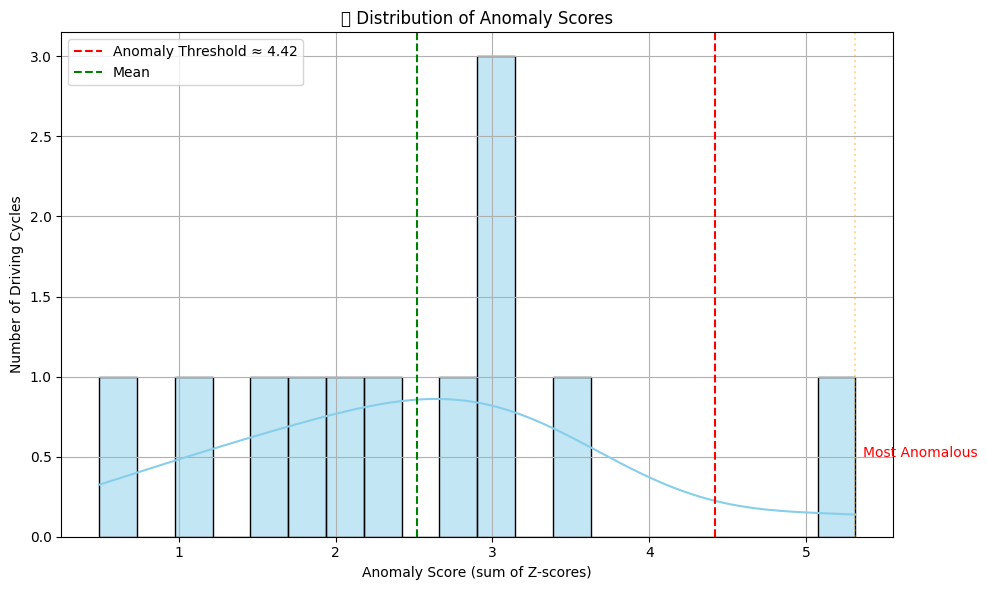

In [20]:
import matplotlib.pyplot as plt

# Set up threshold
threshold = summary_df['anomaly_score'].mean() + 1.5 * summary_df['anomaly_score'].std()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(summary_df['anomaly_score'], bins=20, kde=True, color='skyblue')

# Add threshold line
plt.axvline(threshold, color='red', linestyle='--', label=f'Anomaly Threshold ≈ {threshold:.2f}')
plt.axvline(summary_df['anomaly_score'].mean(), color='green', linestyle='--', label='Mean')

for score in summary_df[summary_df['anomaly_score'] > threshold]['anomaly_score']:
    plt.axvline(score, color='orange', linestyle=':', alpha=0.4)

max_score = summary_df['anomaly_score'].max()
plt.text(max_score + 0.05, 0.5, 'Most Anomalous', color='red')


# Titles and labels
plt.title("📊 Distribution of Anomaly Scores")
plt.xlabel("Anomaly Score (sum of Z-scores)")
plt.ylabel("Number of Driving Cycles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



This chart visualizes the distribution of anomaly scores across 70 real-world electric vehicle driving cycles. Each anomaly score is computed as the sum of absolute Z-scores for three key battery health indicators:
1. Maximum battery temperature
2. Mean current draw
3. Mean battery voltage

The green dashed line represents the mean anomaly score, while the red dashed line marks the anomaly threshold. Trips to the right of the red line are statistically unusual and may warrant diagnostic attention. The faint orange marker highlights the most anomalous trip — TripA32 — which exhibited significantly abnormal behavior across all three metrics.

Let's focus on Trip 32 and look at what might have caused the anomalous results

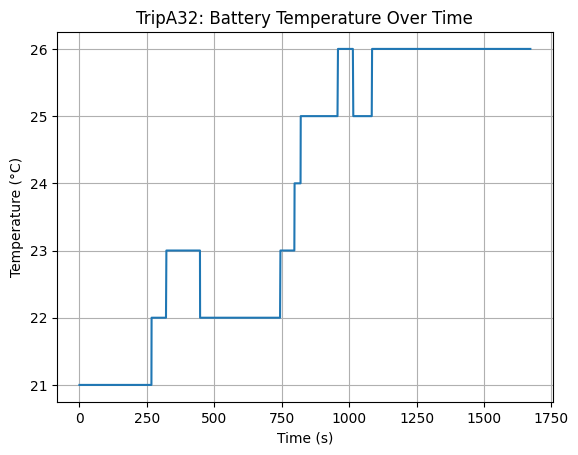

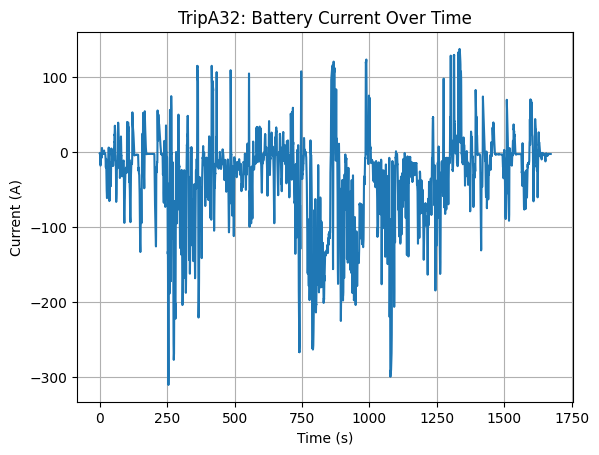

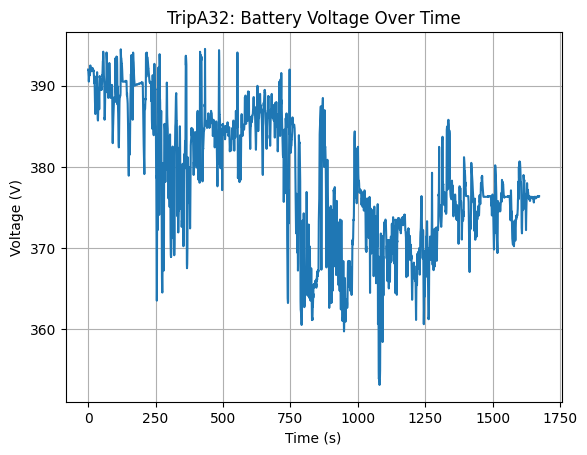

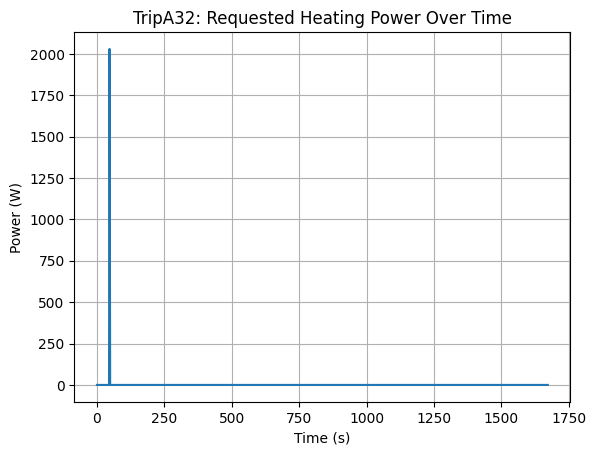

High Current Period (A < -60): 26.4 - 1623.4
Low Voltage Period (V < 375): 253.0 - 1625.0
Heater On Period (Power > 1000W): 45.8 - 47.7


/var/folders/c_/jkdnc4n94cs06lzjk51cbzfm0000gn/T/ipykernel_29402/3528339944.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trip32['flag_high_current'] = df_trip32['battery_current_a'] < thresholds['high_current']
/var/folders/c_/jkdnc4n94cs06lzjk51cbzfm0000gn/T/ipykernel_29402/3528339944.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trip32['flag_low_voltage'] = df_trip32['battery_voltage_v'] < thresholds['low_voltage']
/var/folders/c_/jkdnc4n94cs06lzjk51cbzfm0000gn/T/ipykernel_29402/35283

In [21]:
df_trip32 = df_selected[df_selected['cycle_id'] == 'TripA32']

import matplotlib.pyplot as plt

# 1) Battery Temperature
plt.figure()
plt.plot(df_trip32['time_s'], df_trip32['battery_temperature_c'])
plt.title('TripA32: Battery Temperature Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# 2) Battery Current
plt.figure()
plt.plot(df_trip32['time_s'], df_trip32['battery_current_a'])
plt.title('TripA32: Battery Current Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.grid(True)
plt.show()

# 3) Battery Voltage
plt.figure()
plt.plot(df_trip32['time_s'], df_trip32['battery_voltage_v'])
plt.title('TripA32: Battery Voltage Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

# 4) Requested Heating Power
plt.figure()
plt.plot(df_trip32['time_s'], df_trip32['requested_heating_power_w'])
plt.title('TripA32: Requested Heating Power Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.grid(True)
plt.show()

# Define thresholds
thresholds = {
    'high_current': -60,        # A
    'low_voltage': 375,         # V
    'high_heating_power': 1000  # W
}

# flags for segments
df_trip32['flag_high_current'] = df_trip32['battery_current_a'] < thresholds['high_current']
df_trip32['flag_low_voltage'] = df_trip32['battery_voltage_v'] < thresholds['low_voltage']
df_trip32['flag_heater_on'] = df_trip32['requested_heating_power_w'] > thresholds['high_heating_power']

# Segment time ranges
high_current_range = df_trip32[df_trip32['flag_high_current']]['time_s']
low_voltage_range = df_trip32[df_trip32['flag_low_voltage']]['time_s']
heater_on_range = df_trip32[df_trip32['flag_heater_on']]['time_s']

print("High Current Period (A < -60):", high_current_range.min(), "-", high_current_range.max())
print("Low Voltage Period (V < 375):", low_voltage_range.min(), "-", low_voltage_range.max())
print("Heater On Period (Power > 1000W):", heater_on_range.min(), "-", heater_on_range.max())



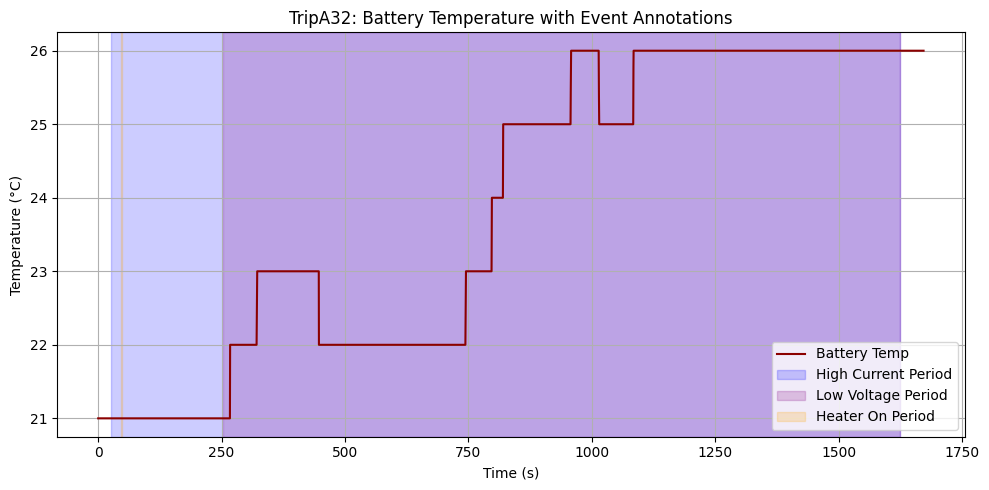

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(df_trip32['time_s'], df_trip32['battery_temperature_c'], label='Battery Temp', color='darkred')

# Overlays
if not high_current_range.empty:
    plt.axvspan(high_current_range.min(), high_current_range.max(), color='blue', alpha=0.2, label='High Current Period')
if not low_voltage_range.empty:
    plt.axvspan(low_voltage_range.min(), low_voltage_range.max(), color='purple', alpha=0.2, label='Low Voltage Period')
if not heater_on_range.empty:
    plt.axvspan(heater_on_range.min(), heater_on_range.max(), color='orange', alpha=0.2, label='Heater On Period')

plt.title('TripA32: Battery Temperature with Event Annotations')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


TripA32 exhibits a distinct thermal anomaly characterized by a combination of compounding stressors. The drive begins with an early heater activation event (0–~30s), causing an immediate thermal load. Shortly after, a sustained period of high current draw (~30–~900s) coincides with a steady increase in battery temperature. This suggests elevated energy demand and potential strain on the battery’s cooling system. Midway through the trip (~250–~1670s), a prolonged voltage drop below 375V indicates possible power delivery inefficiencies or stress under load, even as heating power subsides. By this stage, battery temperature has plateaued at its maximum (26°C), failing to dissipate effectively. 
The compounding effects of thermal load, electrical draw, and voltage instability likely explain the high anomaly score of TripA32 — the highest among all recorded cycles.

/var/folders/c_/jkdnc4n94cs06lzjk51cbzfm0000gn/T/ipykernel_29402/4130124178.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


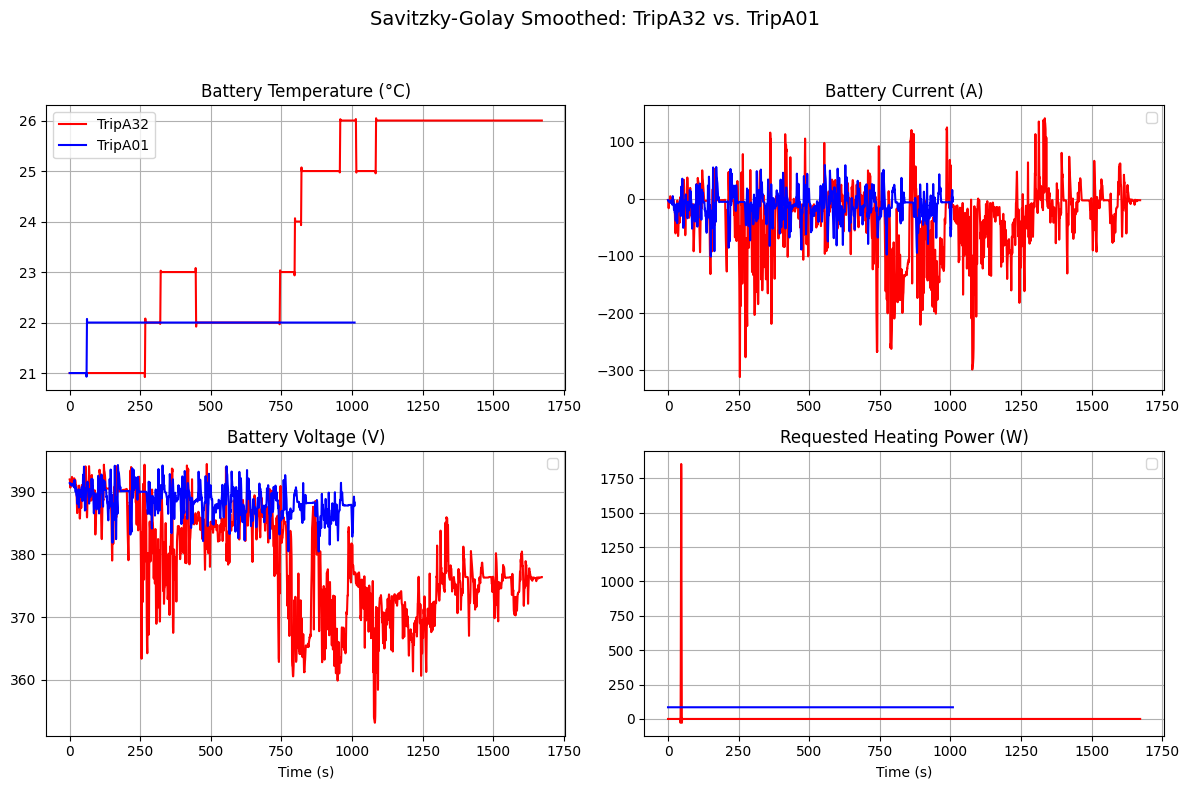

In [23]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

# Filter the two trips from your full dataset
df_trip32 = df_selected[df_selected['cycle_id'] == 'TripA32'].copy()
df_typical = df_selected[df_selected['cycle_id'] == 'TripA01'].copy()

# Apply Savitzky–Golay smoothing
window = 21  # must be odd
poly = 2     # quadratic fit

for col in ['battery_temperature_c', 'battery_current_a', 'battery_voltage_v', 'requested_heating_power_w']:
    df_trip32[f'smooth_{col}'] = savgol_filter(df_trip32[col], window, poly)
    df_typical[f'smooth_{col}'] = savgol_filter(df_typical[col], window, poly)

# Plot 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Savitzky-Golay Smoothed: TripA32 vs. TripA01", fontsize=14)

# Battery Temperature
axs[0, 0].plot(df_trip32['time_s'], df_trip32['smooth_battery_temperature_c'], color='red', label='TripA32')
axs[0, 0].plot(df_typical['time_s'], df_typical['smooth_battery_temperature_c'], color='blue', label='TripA01')
axs[0, 0].set_title('Battery Temperature (°C)')
axs[0, 0].grid(True)

# Battery Current
axs[0, 1].plot(df_trip32['time_s'], df_trip32['smooth_battery_current_a'], color='red')
axs[0, 1].plot(df_typical['time_s'], df_typical['smooth_battery_current_a'], color='blue')
axs[0, 1].set_title('Battery Current (A)')
axs[0, 1].grid(True)

# Battery Voltage
axs[1, 0].plot(df_trip32['time_s'], df_trip32['smooth_battery_voltage_v'], color='red')
axs[1, 0].plot(df_typical['time_s'], df_typical['smooth_battery_voltage_v'], color='blue')
axs[1, 0].set_title('Battery Voltage (V)')
axs[1, 0].set_xlabel('Time (s)')
axs[1, 0].grid(True)

# Requested Heating Power
axs[1, 1].plot(df_trip32['time_s'], df_trip32['smooth_requested_heating_power_w'], color='red')
axs[1, 1].plot(df_typical['time_s'], df_typical['smooth_requested_heating_power_w'], color='blue')
axs[1, 1].set_title('Requested Heating Power (W)')
axs[1, 1].set_xlabel('Time (s)')
axs[1, 1].grid(True)

# Add legends
for ax in axs.flat:
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



## Deep Dive into TripA32
We examine TripA32, which was flagged as highly anomalous, and visualize its temperature, current, and voltage over time.

TripA32 experiences thermal buildup, aggressive current draw, voltage degradation, and a heater spike, all contributing to its highest anomaly score. These deviations, not seen in TripA01, reinforce the validity of TripA32 as a high-risk or high-load scenario for battery performance monitoring.

Clustering driving patterns

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Features to cluster on
features = summary_df[[
    'trip_duration_s',
    'temp_max',
    'current_mean',
    'voltage_mean',
    'heating_power_mean'
]]


# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


/var/folders/c_/jkdnc4n94cs06lzjk51cbzfm0000gn/T/ipykernel_29402/1586034699.py:27: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/yashkathiriya/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


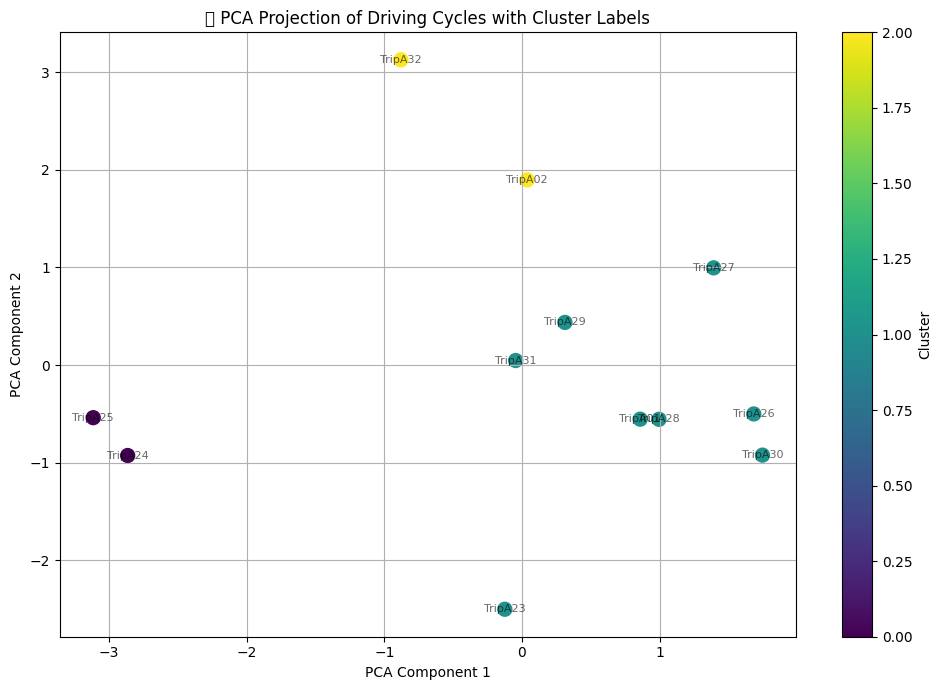

In [25]:
# Apply PCA for visualization (after scaling)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Run KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add results to summary_df
summary_df['cluster'] = clusters
summary_df['pca1'] = X_pca[:, 0]
summary_df['pca2'] = X_pca[:, 1]

# Plot with cycle IDs
plt.figure(figsize=(10, 7))
scatter = plt.scatter(summary_df['pca1'], summary_df['pca2'], c=summary_df['cluster'], cmap='viridis', s=100)

# Annotate each point with its cycle ID
for _, row in summary_df.iterrows():
    plt.text(row['pca1'], row['pca2'], row['cycle_id'], fontsize=8, ha='center', va='center', alpha=0.6)

plt.title("🔍 PCA Projection of Driving Cycles with Cluster Labels")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()



In [26]:
summary_df.groupby('cluster')[[
    'trip_duration_s', 'temp_max', 'current_mean', 'voltage_mean', 'heating_power_mean'
]].mean()


,trip_duration_s,temp_max,current_mean,voltage_mean,heating_power_mean
cluster,,,,,
0,647.3500,19.500,-29.058264,379.155620,1239.742862
1,1416.3125,20.375,-12.108190,385.888782,221.690352
2,1542.5000,26.000,-28.126270,380.024774,43.715226


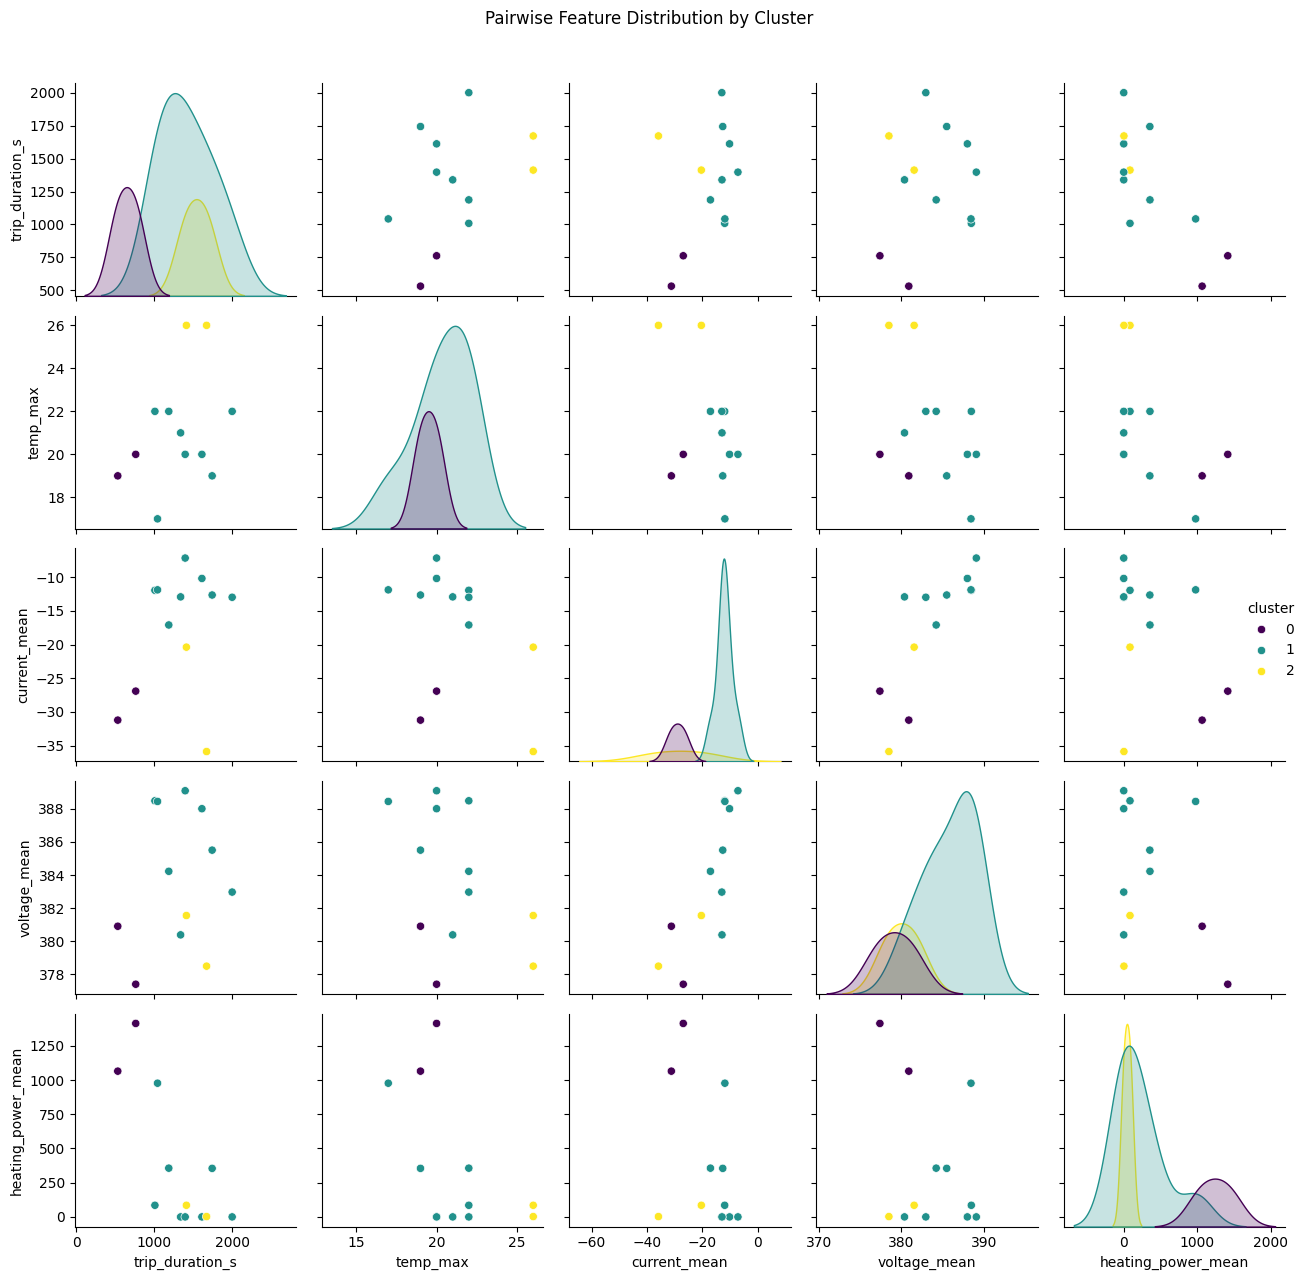

In [27]:
sns.pairplot(summary_df, vars=[
    'trip_duration_s', 'temp_max', 'current_mean', 'voltage_mean', 'heating_power_mean'
], hue='cluster', palette='viridis')
plt.suptitle("Pairwise Feature Distribution by Cluster", y=1.02)
plt.tight_layout()
plt.show()


## PCA and Cluster Driving Cycles
We reduce dimensionality with PCA and apply KMeans to identify similar usage patterns.

In [28]:
# Mean values per cluster

cluster_means = summary_df.groupby('cluster')[
    ['trip_duration_s', 'temp_max', 'current_mean', 'voltage_mean', 'heating_power_mean']
].mean()
print(cluster_means)



         trip_duration_s  temp_max  current_mean  voltage_mean  \
cluster                                                          
0               647.3500    19.500    -29.058264    379.155620   
1              1416.3125    20.375    -12.108190    385.888782   
2              1542.5000    26.000    -28.126270    380.024774   

         heating_power_mean  
cluster                      
0               1239.742862  
1                221.690352  
2                 43.715226  


In [29]:
cluster_labels = {
    0: 'Urban Mild',
    1: 'Normal',
    2: 'High Stress'
}
summary_df['cluster_label'] = summary_df['cluster'].map(cluster_labels)

/var/folders/c_/jkdnc4n94cs06lzjk51cbzfm0000gn/T/ipykernel_29402/566446037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/c_/jkdnc4n94cs06lzjk51cbzfm0000gn/T/ipykernel_29402/566446037.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/yashkathiriya/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


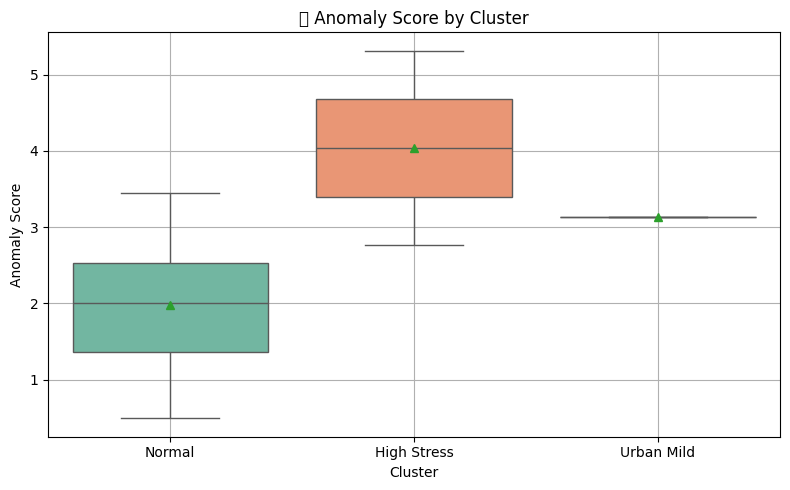

In [30]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='cluster_label',
    y='anomaly_score',
    data=summary_df,
    palette='Set2',
    showmeans=True  # will add a dot for single point
)
plt.title("📊 Anomaly Score by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Anomaly Score")
plt.grid(True)
plt.tight_layout()
plt.show()



While most cycles grouped into ‘Normal’ or ‘High Stress’, the algorithm isolated one cycle into a distinct Urban Mild cluster — characterized by short duration and low power demands. Though limited in sample size, this reflects a low-stress urban usage profile.

## Interactive Anomaly Dashboard

To make this project interactive, I built a Streamlit dashboard that allows users to:
- Upload a driving cycle summary (e.g., `cycle_summary.csv`)
- Select any trip by ID
- View anomaly scores calculated using Z-score aggregation
- Get an instant flag for potentially anomalous behavior

How to run:
1. Install Streamlit: `pip install streamlit`
2. Run the app: `streamlit run battery_dashboard.py`
3. Upload your CSV file and explore each trip!

➡️ This dashboard demonstrates how the analysis could be integrated into a diagnostic tool or telemetry dashboard for engineers or fleet managers.

## Takeaway

This project provided a comprehensive framework for identifying anomalous electric vehicle battery behavior across real-world driving cycles. By combining statistical outlier detection with unsupervised clustering, I was able to surface usage patterns linked to elevated thermal load, voltage instability, and high current draw — all of which may contribute to long-term battery stress. The system flags early behavioral indicators (e.g., temperature spikes, excessive heating power, sharp voltage drops) that are known precursors to degradation and potential failure modes. 